In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#  Cleaning Data


In [5]:
df.rename(columns={'v1':'class','v2':'content'},inplace=True)

In [6]:
df=df[['class','content']]

In [7]:
df.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['class'] = df['class'].map({'ham': 0, 'spam': 1})

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

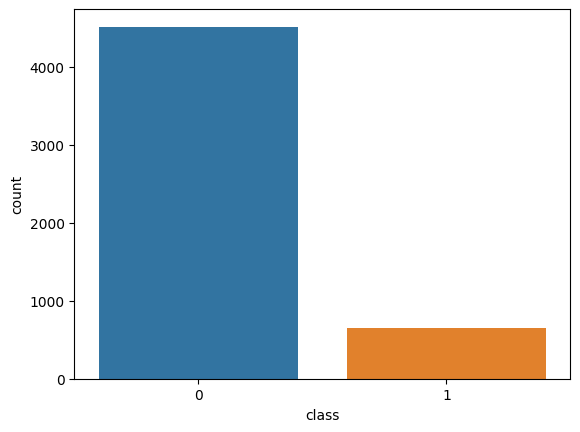

In [12]:
sns.countplot(x=df['class'])
plt.show()

spam: 1
ham: 0


In [13]:
!pip install nltk

In [14]:
# Down load thư viện nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thamizh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thamizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [16]:
porter = PorterStemmer()
def tranform_stemming_word(sentence):
    sentence = sentence.lower()
    sentence = nltk.word_tokenize(sentence)

    text = []
    sup_text = []
    for word in sentence:
        if word.isalnum():
            text.append(word)

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            sup_text.append(i)
    text=sup_text[:]
    sup_text.clear()

    stemmed_words = [porter.stem(word) for word in text]
    stemmed_sentence = ' '.join(stemmed_words)

    return stemmed_sentence

In [17]:
tranform_stemming_word("hello guys I am Quoc")

'hello guy quoc'

In [18]:
df['transformed_stemming']=df.content.apply(tranform_stemming_word)

In [19]:
df.head()

,class,content,transformed_stemming
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [20]:
spam_word=[]
for msg in df[df['class']==1]['transformed_stemming'].tolist():
    for word in msg.split():
        spam_word.append(word)

In [21]:
from collections import Counter
print("lenght of spam_word: ", len(spam_word))
Counter(spam_word).most_common(15)


lenght of spam_word:  9939


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64)]

In [22]:
ham_word = []
for msg in df[df['class']==0]['transformed_stemming'].tolist():
    for word in msg.split():
        ham_word.append(word)

In [23]:
print("lenght of ham_word: ", len(ham_word))
Counter(ham_word).most_common(15)


lenght of ham_word:  35404


[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213)]

### Training model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# df.reset_index(inplace=True)
# df.head()

In [25]:
X = vectorizer.fit_transform(df['transformed_stemming']).toarray()
y = df['class'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,precision_score , recall_score, accuracy_score, f1_score
model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Hiển thị kết quả
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))
print(f'F1 Score: {f1:.4f}')



Accuracy: 0.97678916827853
Confusion Matrix:
 [[1327    4]
 [  32  188]]
Precision: 97.92%
Recall: 85.45%
F1 Score: 0.9126


### Test Model

In [28]:
new_message = "URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"

processed_message = tranform_stemming_word(new_message)
processed_message_2d = [processed_message]
vectorizer = CountVectorizer(vocabulary=vectorizer.vocabulary_)
X_new_message = vectorizer.transform(processed_message_2d)
y_pred = model.predict(X_new_message)
if y_pred[0] == 1:
    print("This message is classified as spam.")
else:
    print("This message is classified as ham.")

This message is classified as spam.


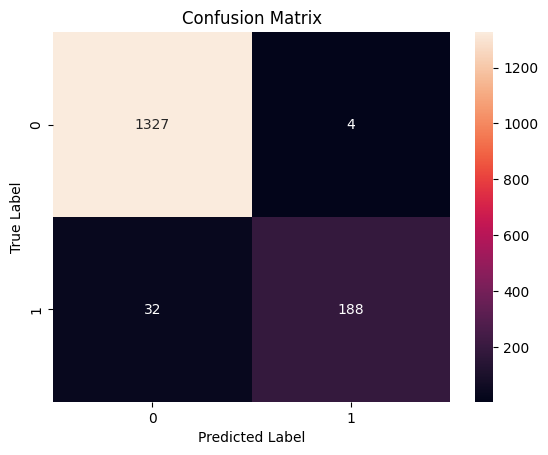

In [29]:
sns.heatmap(conf_matrix,annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


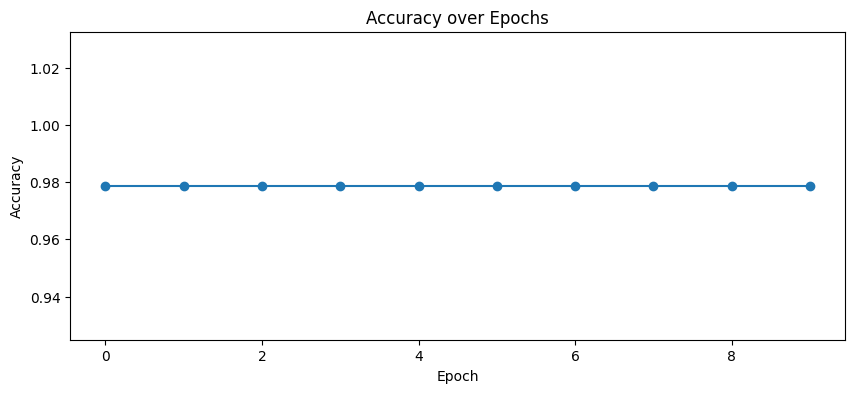

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
epochs = []
accuracy_values = []
confusion_matrices = []

for epoch in range(10):
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá độ chính xác và ma trận confusion
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # Lưu giữ kết quả
    epochs.append(epoch)
    accuracy_values.append(accuracy)
    confusion_matrices.append(confusion)

# Biểu đồ độ chính xác theo epoch
plt.figure(figsize=(10, 4))
plt.plot(epochs, accuracy_values, marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()




In [31]:


def processing_script_batch(batch, batch_size):
  if(batch < len(X) // batch_size):
    start_idx = batch * batch_size
    end_idx = (batch + 1) * batch_size

    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    # Huấn luyện mô hình
    model.fit(X_batch, y_batch)
    # Đánh giá độ chính xác sau mỗi batch
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Đánh giá ma trận confusion
    confusion = confusion_matrix(y_test, y_pred)

    return True, batch, accuracy, confusion
  else:
    print('Invalid batch')
    return False, None, None, None

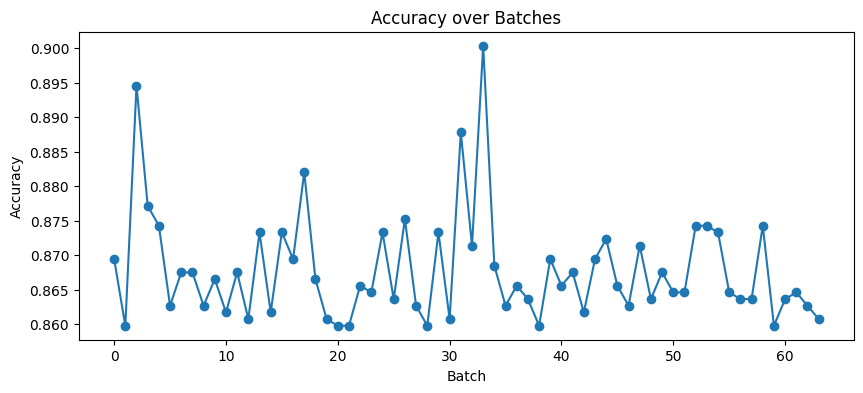

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình
model = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)

batch_size = 64
# Các biến để lưu kết quả
batches = []
accuracy_values = []
confusion_matrices = []


# Tính toán số lượng batch
num_batches = len(X_train) // batch_size

# Huấn luyện mô hình và ghi lại kết quả sau mỗi batch
for batch in range(num_batches):
  valid, batch, accuracy, confusion = processing_script_batch(batch, batch_size)
  if(valid):
    accuracy_values.append(accuracy)
    confusion_matrices.append(confusion)
    batches.append(batch)



# Biểu đồ độ chính xác theo từng batch
plt.figure(figsize=(10, 4))
plt.plot(batches, accuracy_values, marker='o')
plt.title('Accuracy over Batches')
plt.xlabel('Batch')
plt.ylabel('Accuracy')
plt.show()



### Processing script

Accuracy: 0.8800773694390716


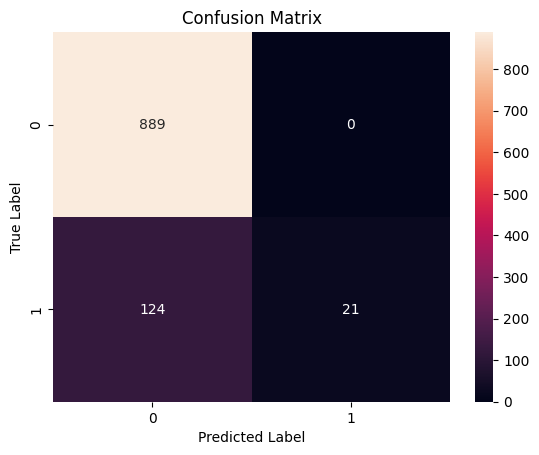

In [33]:

batch_size = 90
new_batch = 3
valid, batch, accuracy, confusion = processing_script_batch(new_batch, batch_size)

if(valid):
  print("Accuracy:", accuracy)
  sns.heatmap(confusion,annot=True, fmt='d')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


